In [20]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

In [21]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [22]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/DQ_250GeV_ss.minp10.distcut.polar.true.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp10maxp60.hit210.offset.dEdxMin.cheat.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset0.25.dEdxMin.root")

# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.mergeFULL.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.mergeFULL.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.neutral.mergeFULL.root")

# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.ISRcut.mergeFULL.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.ISRcut.mergeFULL.root")
# file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.AdrianISRcut.mergeFULL.root")
file1 = TFile.Open("../../../analysis/ssbar/dEdx_dist/rootfiles/double_tag/DQ_250GeV_ss.minp20maxp60.hit210.offset.dEdxMin.OppKMult.KPicross.K_cos.AllEvents.root")


In [23]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())
    
def Normal2(h1):
    h1.Scale(1.0/h1.Integral(12,88))

In [24]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_cnt_nevents', 'h_cnt_nevents_KPi', 'h_cnt_ISRevents', 'h_mc_stable_nKaons_evt', 'h_mc_quark_cos', 'h_mc_qq_TotE', 'h_mc_qq_InvM', 'h_mc_visibleE', 'h_mc_QQsep', 'h_pfo_visibleE', 'h_pfo_Jetsep', 'h_pfo_jet_TotE', 'h_pfo_jet_InvM', 'h_pfo_pv_kaon', 'h_pfo_pv_pion', 'h_pfo_pv_proton', 'h_pfo_neu_E', 'h_pfo_neu_p', 'h_pfo_neu_E_wrong', 'h_pfo_neu_p_wrong', 'h_pfo_neu_E_correct', 'h_pfo_neu_p_correct', 'h_pfo_kdEdx_dist_kaon', 'h_pfo_kdEdx_dist_proton', 'h_pfo_kdEdx_dist_pion', 'h_pfo_kdEdx_dist_electron', 'h_pfo_kdEdx_dist_muon', 'h_pfo_kdEdx_dist_others', 'h_pfo_pidEdx_dist_kaon', 'h_pfo_pidEdx_dist_proton', 'h_pfo_pidEdx_dist_pion', 'h_pfo_pidEdx_dist_electron', 'h_pfo_pidEdx_dist_muon', 'h_pfo_pidEdx_dist_others', 'h_pfo_pdEdx_dist_kaon', 'h_pfo_pdEdx_dist_proton', 'h_pfo_pdEdx_dist_pion', 'h_pfo_pdEdx_dist_electron', 'h_pfo_pdEdx_dist_muon', 'h_pfo_pdEdx_dist_others', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cos_kaon', 'h_pfo_LeadKaons_cos_proton', 'h_pfo_LeadKaons_cos_pion', 'h_pf

In [25]:
h_mc_quark_cos = file1.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos = file1.Get("h_pfo_LeadKaons_cos")

makePretty(h_mc_quark_cos,kBlack)
makePretty(h_pfo_LeadKaons_cos,kBlue)

In [26]:
# Normal(h_mc_quark_cos)
# Normal(h_pfo_LeadKaons_cos)

Normal2(h_mc_quark_cos)
Normal2(h_pfo_LeadKaons_cos)

In [27]:
c1 = TCanvas("c1","c1",500,500)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [28]:
h_pfo_LeadKaons_cos.GetXaxis().SetTitle("cos#theta_{s,K^{-}}");

h_pfo_LeadKaons_cos.Draw("h")
h_mc_quark_cos.Draw("hsame")

In [29]:
leg = TLegend(0.25,0.85,0.5,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_mc_quark_cos,"Parton Level","fp")
leg.AddEntry(h_pfo_LeadKaons_cos,"LeadK Reco","fp")
leg.Draw()

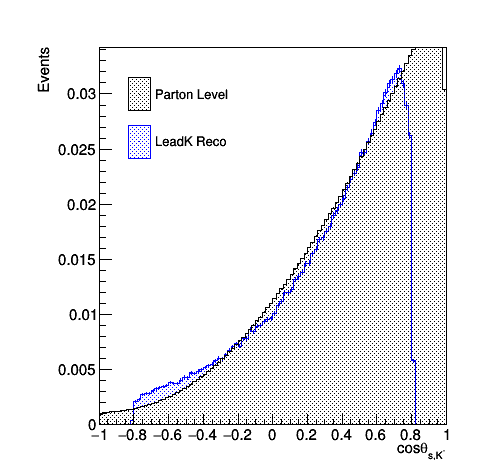

In [30]:
c1.Draw()

### Now let's fit the function

In [31]:
fgen  = TF1("fgen","[0]*(1+x*x)+[1]*x",-1.0,1.0)
freco = TF1("freco","[0]*(1+x*x)+[1]*x",-0.8,0.8)

fgen.SetParNames("S","A")
freco.SetParNames("S","A")

h_mc_quark_cos.Fit("fgen","MNRS")
h_pfo_LeadKaons_cos.Fit("freco","MNRS")

fgen.SetLineStyle(2)
fgen.SetLineColor(kGreen+1)

freco.SetLineStyle(2)
freco.SetLineColor(kGray+3)

 FCN=149818 FROM HESSE     STATUS=OK             10 CALLS          55 TOTAL
                     EDM=5.0506e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  S            1.07201e-02   1.71097e-06   1.11397e-07  -3.81287e+01
   2  A            2.01917e-02   3.69024e-06   2.40262e-07   1.54382e+01
 FCN=1385.45 FROM HESSE     STATUS=OK             10 CALLS          53 TOTAL
                     EDM=2.3333e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  S            1.08477e-02   1.88059e-05   1.71686e-07  -1.61760e-01
   2  A            1.89806e-02   4.67354e-05   1.69344e-07   4.58188e-02


In [32]:
c2 = TCanvas("c2","c2",500,500)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


In [33]:
h_mc_quark_cos.GetYaxis().SetRangeUser(0,0.04)
h_mc_quark_cos.Draw("h")
h_pfo_LeadKaons_cos.Draw("same")
fgen.Draw("same")
freco.Draw("same")

In [34]:
leg2 = TLegend(0.25,0.85,0.5,0.65,"","brNDC")
leg2.SetFillColor(kWhite)
leg2.SetBorderSize(0)
leg2.SetTextSize(0.03)
leg2.AddEntry(h_mc_quark_cos,"Gen","f")
leg2.AddEntry(h_pfo_LeadKaons_cos,"Reco","pl")
leg2.AddEntry(fgen,"Gen Fit","l")
leg2.AddEntry(freco,"Reco Fit","l")
leg2.Draw()

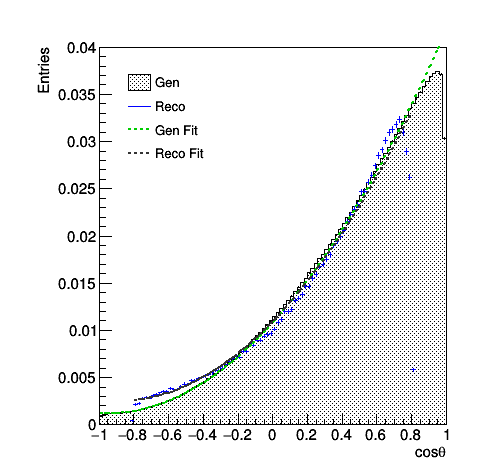

In [35]:
c2.Draw()

## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```